In [124]:
%pip install scikit-learn


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [194]:
import pandas as pd
import numpy as np
import plotly_express as px
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB

In [64]:
data = pd.read_csv('Visa_For_Lisa_Loan_Modelling.csv')

## Dataset

In [181]:
data.drop('ID', axis=1, inplace=True)

In [182]:
data

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Target
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0,49
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0,34
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0,11
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0,100
4,35,8,45,91330,4,1.0,2,0,0,0,0,0,1,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,92697,1,1.9,3,0,0,0,0,1,0,40
4996,30,4,15,92037,4,0.4,1,85,0,0,0,1,0,15
4997,63,39,24,93023,2,0.3,3,0,0,0,0,0,0,24
4998,65,40,49,90034,3,0.5,2,0,0,0,0,1,0,49


## Statistics of Dataset

In [183]:
print(data.info())
print()
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Income              5000 non-null   int64  
 3   ZIP Code            5000 non-null   int64  
 4   Family              5000 non-null   int64  
 5   CCAvg               5000 non-null   float64
 6   Education           5000 non-null   int64  
 7   Mortgage            5000 non-null   int64  
 8   Personal Loan       5000 non-null   int64  
 9   Securities Account  5000 non-null   int64  
 10  CD Account          5000 non-null   int64  
 11  Online              5000 non-null   int64  
 12  CreditCard          5000 non-null   int64  
 13  Target              5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB
None

               Age   Experience       Income      

In [185]:
data.isnull().sum()

Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
Target                0
dtype: int64

## Visualizations

In [186]:
fig = px.imshow(data.corr(), text_auto=True, width=800, height=800)
fig.update_layout(title='Correlation')
fig.show()

In [156]:
fig = px.histogram(data, x='Age', y='Mortgage', barmode='group', text_auto=True)
fig.update_layout(title='Distribution of mortgage according to ages', height=400, width=1200)
fig.update_layout(xaxis_title='Ages', yaxis_title='Counts')
fig.show()

In [68]:
a = pd.cut(data['Education'], bins=3)
counts = a.value_counts().sort_index()
legend_names = ['Graduate', 'High School', 'Professional Degree']
fig = px.pie(names=legend_names, values=counts.values, title='Education Distribution')
fig.show()

In [169]:
loan = pd.cut(data['Personal Loan'], bins=2)
counts = loan.value_counts().sort_index()
legend_names = ['No', 'Yes']
fig = px.bar(x=legend_names, y=counts.values, title='Presence of Personal Loans', color=legend_names, text_auto=True)
fig.update_layout(xaxis_title='Personal Loan', yaxis_title='Counts')
fig.show()

In [162]:
credit_card_not = data['CreditCard'] == 0
credit_card_not = credit_card_not.sum()
credit_card_yes = data['CreditCard'] == 1
credit_card_yes = credit_card_yes.sum()
fig = px.pie(names=['Yes', 'No'], values=[credit_card_yes, credit_card_not], title='Distribution of Credit Card Usage')
fig.show()

In [172]:
loan = pd.cut(data['Securities Account'], bins=2)
counts = loan.value_counts().sort_index()
legend_names = ['No', 'Yes']
fig = px.bar(x=counts.values, y=legend_names, title='Distribution of Securities Account', color=legend_names, text_auto=True, orientation='h')
fig.update_layout(xaxis_title='Securities Account', yaxis_title='Counts')
fig.show()

In [171]:
data4 = data.copy()
value = data4['CCAvg'].sort_values(ascending=False).head(120)
color = data4['CCAvg'].astype(str).head(120)
data4['Family'] = data4['Family'].replace({1: 'Family(1 person)', 2:'Family(2 people)', 3: 'Family(3 people)', 4: 'Family(4 people)'}).head(120)
path_1 = data4['Family'].astype(str).head(120)

fig = px.sunburst(data4, path=[path_1, color], values=value, color=color)
fig.update_layout(title_text='Chart of Top 30 CCAvg Values for Each Family Category')
fig.show()

In [74]:
bins = [0, 5, 10, 20, 30, float('inf')]
labels = ['Less than 5', 'Between 5 and 10', 'Between 10 and 20', 'Between 20 and 30', 'More than 30']
data2 = data.copy()
data2['Experience'] = pd.cut(data['Experience'], bins=bins, labels=labels)
data2 = data2.groupby(['CreditCard', 'Experience'])['Income'].mean().reset_index()

fig = px.histogram(data2, x='Experience', y='Income', color='CreditCard', barmode='group', text_auto=True)
fig.update_layout(title='Statistics of clients by Experience and Credit Card', yaxis_title='Income')
fig.show()

In [104]:
data3 = data.copy()
data3['ZIP Code'] = data3['ZIP Code'].astype(str)
zip_counts = data3.groupby('ZIP Code').size().reset_index(name='Count')
zip_counts_sorted = zip_counts.sort_values(by='Count', ascending=False).head(30)
fig = px.bar(zip_counts_sorted, x='ZIP Code', y='Count', color='ZIP Code', text_auto=True)
fig.update_layout(title='Number of clients by Zip Code location')
fig.show()

## Machine Learning 

In [173]:
X = data.drop('Personal Loan', axis=1)
y = data['Personal Loan']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [187]:
def fit_model(model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print('Model name: ', str(model))
    print(f'Accurance Score: {int(accuracy_score(y_test, y_pred) * 100)}%')
    print(f'Mean Squared Error: {round(mean_squared_error(y_test, y_pred), 3) * 100}%')
    print(f'Cross Validation Score: {int(np.mean(cross_val_score(model, X_train, y_train, cv=10)) * 100)}%')
    print(f'Confusion Matrix:')
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.show()

## Logistic Regression

Model name:  LogisticRegression()
Accurance Score: 95%
Mean Squared Error: 4.9%
Cross Validation Score: 92%
Confusion Matrix:


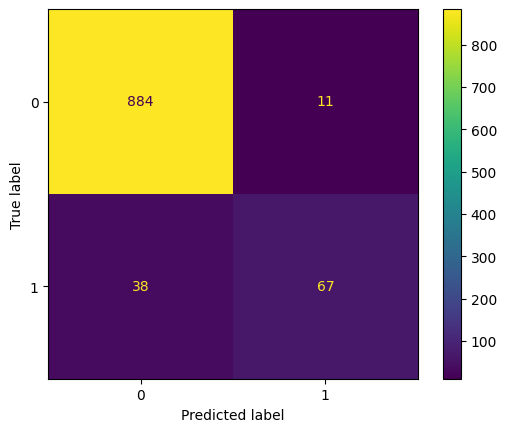

In [188]:
model = LogisticRegression()
fit_model(model)

## Decision Tree Classifier

Model name:  DecisionTreeClassifier()
Accurance Score: 98%
Mean Squared Error: 1.2%
Cross Validation Score: 98%
Confusion Matrix:


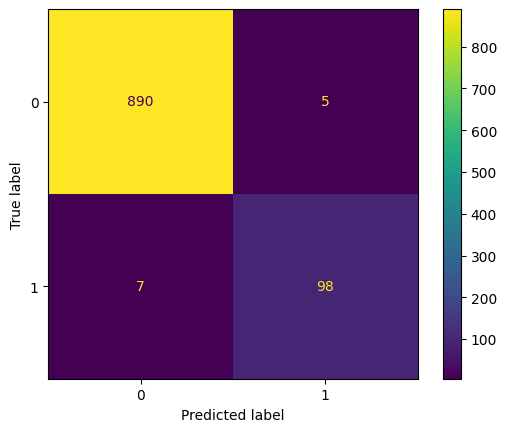

In [189]:
model = DecisionTreeClassifier()
fit_model(model)

## Random Forest Classifier

Model name:  RandomForestClassifier()
Accurance Score: 99%
Mean Squared Error: 1.0%
Cross Validation Score: 98%
Confusion Matrix:


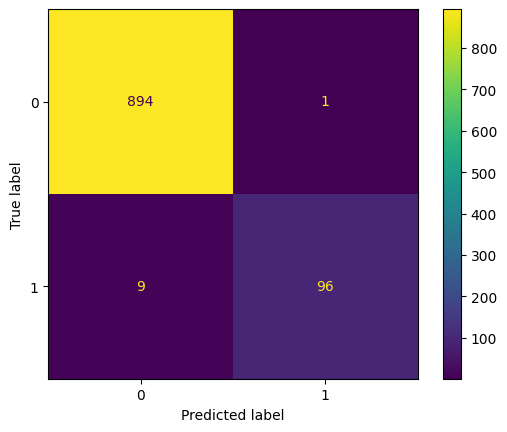

In [190]:
model = RandomForestClassifier()
fit_model(model)

## SVC

Model name:  SVC()
Accurance Score: 89%
Mean Squared Error: 10.5%
Cross Validation Score: 90%
Confusion Matrix:


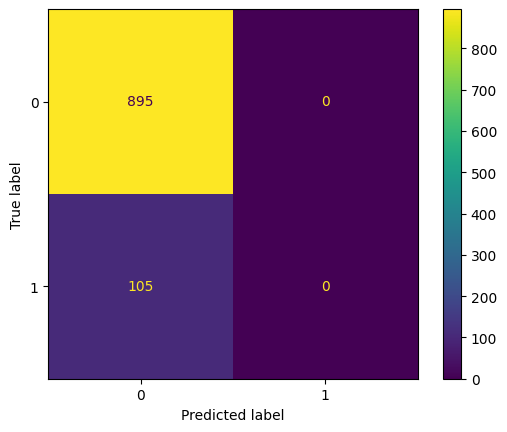

In [191]:
model = SVC()
fit_model(model)

## KNN

Model name:  KNeighborsClassifier()
Accurance Score: 89%
Mean Squared Error: 10.5%
Cross Validation Score: 90%
Confusion Matrix:


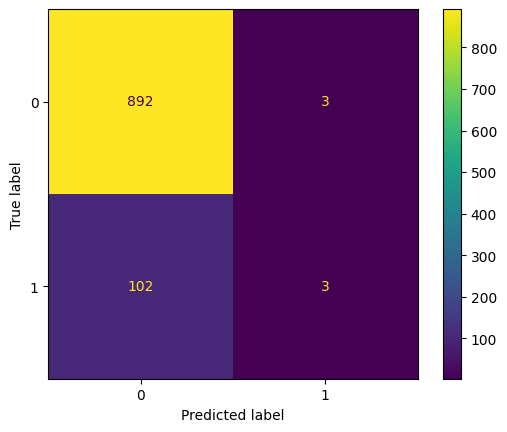

In [192]:
model = KNeighborsClassifier()
fit_model(model)

## Linear Discriminant Analysis

Model name:  LinearDiscriminantAnalysis()
Accurance Score: 94%
Mean Squared Error: 5.3%
Cross Validation Score: 94%
Confusion Matrix:


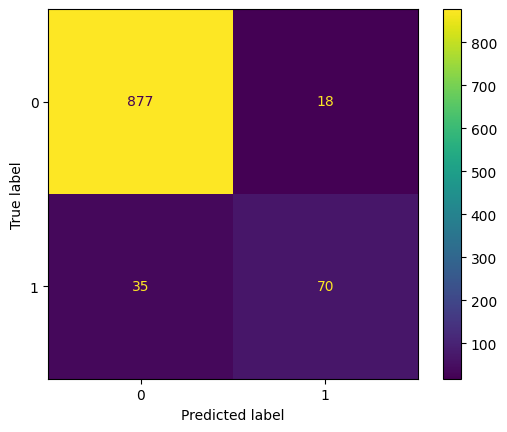

In [193]:
model = LinearDiscriminantAnalysis()
fit_model(model)

## GaussianNB

Model name:  GaussianNB()
Accurance Score: 90%
Mean Squared Error: 9.3%
Cross Validation Score: 89%
Confusion Matrix:


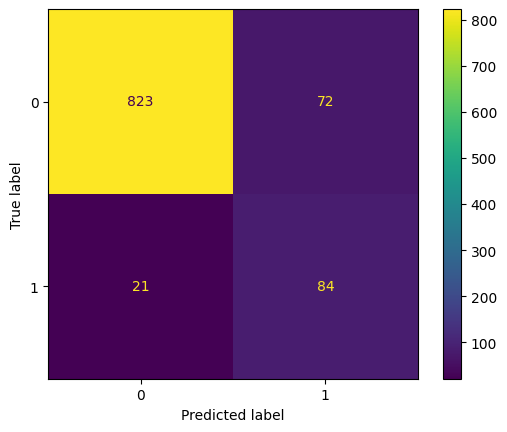

In [195]:
model = GaussianNB()
fit_model(model)